In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('ElectionData.csv')

In [3]:
df.head()

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12


In [4]:
# Dropping columns from correlation heatmap with ultiple observations of high correlation coefficients(>0.90) to avoid multicollinearity
df.drop(['totalMandates','numParishesApproved','blankVotes','nullVotes','subscribedVoters','totalVoters','pre.blankVotes','pre.nullVotes','pre.subscribedVoters','pre.totalVoters','Percentage','Mandates','pre.blankVotesPercentage','pre.votersPercentage'],axis=1,inplace=True)

In [5]:
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12


In [6]:
df['territoryName'].value_counts()

territoryName
Território Nacional    1134
Braga                  1134
Leiria                 1134
Porto                  1134
Aveiro                 1080
Viana do Castelo       1080
Viseu                  1080
Lisboa                 1080
Coimbra                1080
Setúbal                1080
Madeira                1080
Santarém               1026
Guarda                 1026
Faro                   1026
Évora                  1026
Castelo Branco          972
Bragança                972
Beja                    918
Portalegre              918
Vila Real               864
Açores                  799
Name: count, dtype: int64

In [7]:
df['Party'].value_counts()

Party
PS           1127
PPD/PSD      1127
B.E.         1127
CDS-PP       1127
PCP-PEV      1127
PAN          1127
CH           1127
PCTP/MRPP    1127
A            1127
IL           1127
L            1127
PNR          1127
PDR          1127
PPM          1073
R.I.R.       1026
PTP          1019
MPT          1019
PURP          972
NC            972
JPP           486
MAS           425
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TimeElapsed              21643 non-null  int64  
 1   time                     21643 non-null  object 
 2   territoryName            21643 non-null  object 
 3   availableMandates        21643 non-null  int64  
 4   numParishes              21643 non-null  int64  
 5   blankVotesPercentage     21643 non-null  float64
 6   nullVotesPercentage      21643 non-null  float64
 7   votersPercentage         21643 non-null  float64
 8   pre.nullVotesPercentage  21643 non-null  float64
 9   Party                    21643 non-null  object 
 10  validVotesPercentage     21643 non-null  float64
 11  Votes                    21643 non-null  int64  
 12  Hondt                    21643 non-null  int64  
 13  FinalMandates            21643 non-null  int64  
dtypes: float64(5), int64(6

In [9]:
numerical_variables=[features for features in df.columns if df[features].dtypes!='O']
numerical_variables.remove('FinalMandates')
numerical_variables

['TimeElapsed',
 'availableMandates',
 'numParishes',
 'blankVotesPercentage',
 'nullVotesPercentage',
 'votersPercentage',
 'pre.nullVotesPercentage',
 'validVotesPercentage',
 'Votes',
 'Hondt']

<Axes: >

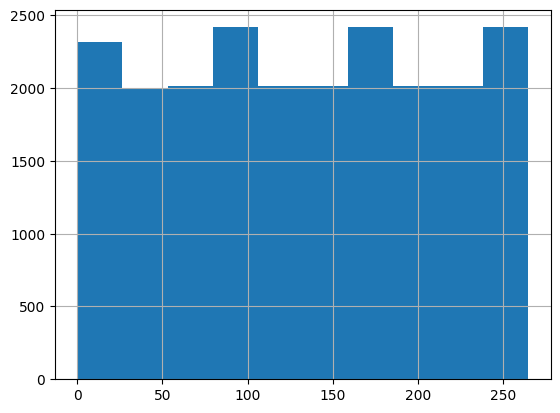

In [10]:
df['TimeElapsed'].hist()

<Axes: >

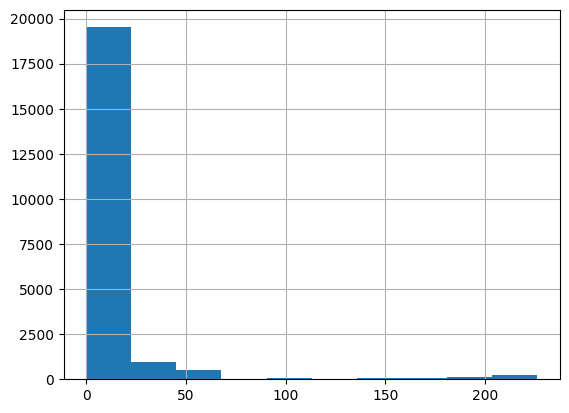

In [11]:
df['availableMandates'].hist()

<Axes: >

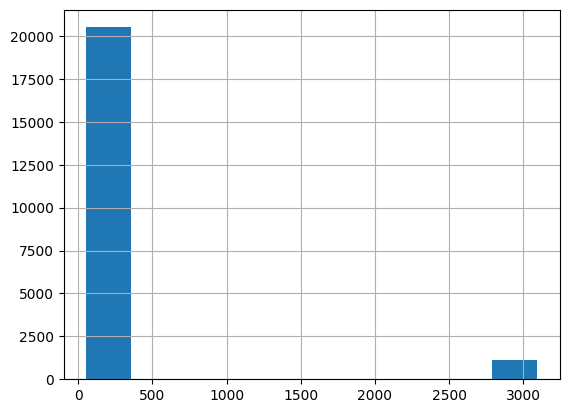

In [12]:
df['numParishes'].hist()

<Axes: >

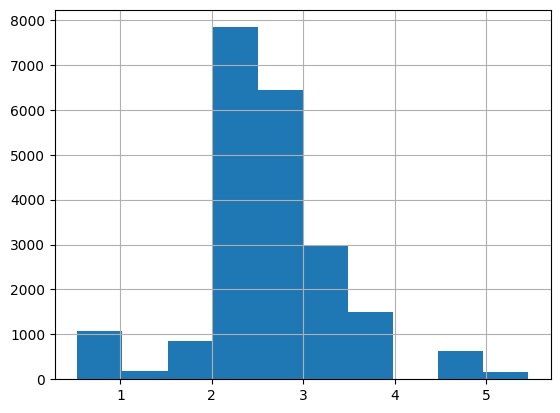

In [13]:
df['blankVotesPercentage'].hist()

<Axes: >

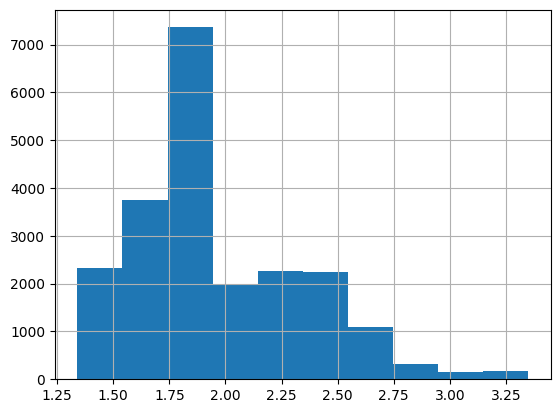

In [14]:
df['nullVotesPercentage'].hist()

<Axes: >

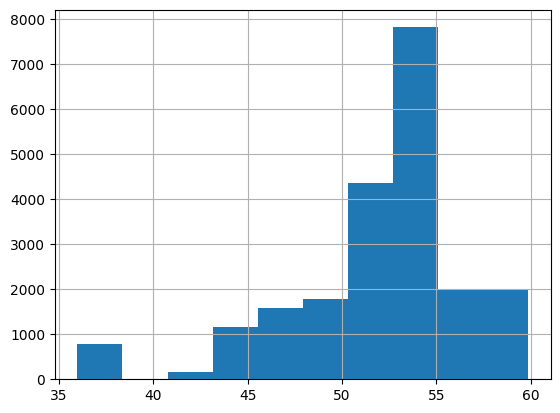

In [15]:
df['votersPercentage'].hist()

<Axes: >

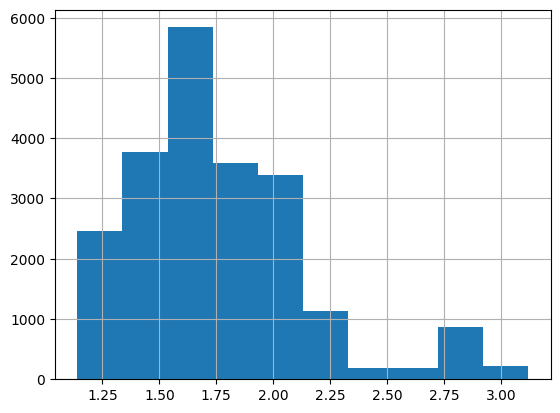

In [16]:
df['pre.nullVotesPercentage'].hist()

<Axes: >

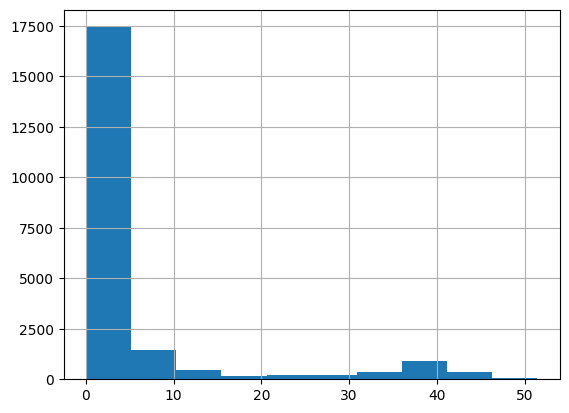

In [17]:
df['validVotesPercentage'].hist()

<Axes: >

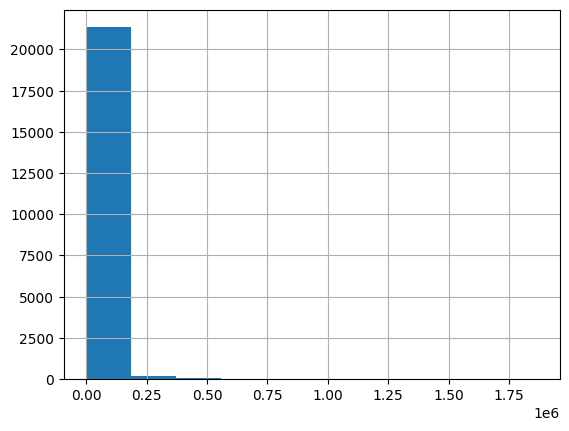

In [18]:
df['Votes'].hist()

<Axes: >

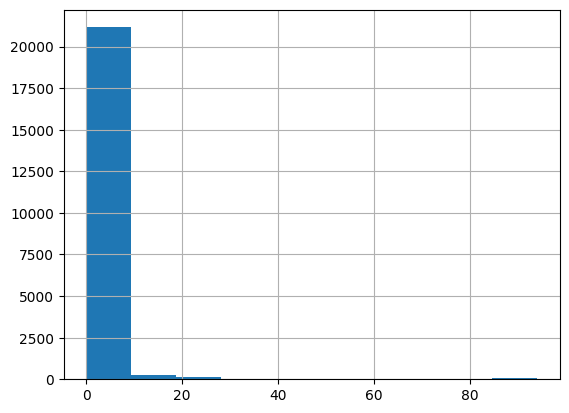

In [19]:
df['Hondt'].hist()

In [20]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [21]:
pd.pivot_table(df, index =['territoryName','availableMandates'] ,values = 'numParishes').sort_values('numParishes',ascending=False)

numParishes
territoryName       availableMandates             
Território Nacional 144                     3092.0
                    139                     3092.0
                    130                     3092.0
                    0                       3092.0
                    77                      3092.0
                    82                      3092.0
                    214                     3092.0
                    226                     3092.0
                    212                     3092.0
                    63                      3092.0
                    53                      3092.0
                    50                      3092.0
                    48                      3092.0
                    42                      3092.0
                    41                      3092.0
                    38                      3092.0
                    29                      3092.0
                    25                      3092.0
                    17                      3092.0
                    16                      3092.0
                    15                      3092.0
                    9                       3092.0
                    94                      3092.0
                    210                     3092.0
                    204                     3092.0
                    199                     3092.0
                    190                     3092.0
                    189                     3092.0
                    175                     3092.0
                    165                     3092.0
                    162                     3092.0
                    158                     3092.0
                    101                     3092.0
                    97                      3092.0
                    116                     3092.0
Braga               8                        347.0
                    12                       347.0
                    0                        347.0
                    5                        347.0
                    6                        347.0
                    7                        347.0
                    13                       347.0
                    14                       347.0
                    15                       347.0
                    16                       347.0
                    19                       347.0
                    9                        347.0
                    10                       347.0
Viseu               8                        277.0
                    0                        277.0
                    6                        277.0
                    4                        277.0
Porto               0                        243.0
                    22                       243.0
                    12                       243.0
                    14                       243.0
                    9                        243.0
                    10                       243.0
                    20                       243.0
                    21                       243.0
                    35                       243.0
                    34                       243.0
                    37                       243.0
                    24                       243.0
                    25                       243.0
                    26                       243.0
                    28                       243.0
                    30                       243.0
                    31                       243.0
                    33                       243.0
                    36                       243.0
                    8                        243.0
                    40                       243.0
                    38                       243.0
Guarda              0                        242.0
                    3                        242.0
Bragança            3                        226.0
          

In [22]:
pd.pivot_table(df, index ='Party' ,values = 'blankVotesPercentage').sort_values('blankVotesPercentage',ascending=False)

,blankVotesPercentage
Party,
MAS,3.033035
JPP,2.710329
MPT,2.671384
PPM,2.638211
A,2.618181
IL,2.618181
CH,2.618181
CDS-PP,2.618181
B.E.,2.618181


In [23]:
pd.pivot_table(df, index ='Party' ,values = 'nullVotesPercentage').sort_values('nullVotesPercentage',ascending=False)

,nullVotesPercentage
Party,
R.I.R.,1.995624
PURP,1.970031
PPM,1.967875
B.E.,1.965741
A,1.965741
IL,1.965741
CH,1.965741
CDS-PP,1.965741
L,1.965741


In [24]:
pd.pivot_table(df, index ='Party' ,values = 'validVotesPercentage').sort_values('validVotesPercentage',ascending=False)

,validVotesPercentage
Party,
PS,39.513789
PPD/PSD,30.498900
B.E.,8.941145
PCP-PEV,6.982227
CDS-PP,4.674836
PAN,2.544020
CH,1.362236
PCTP/MRPP,0.780195
R.I.R.,0.763733


In [25]:
pd.pivot_table(df,index ='Party', values = 'FinalMandates',aggfunc=np.mean).sort_values('FinalMandates', ascending = False)

,FinalMandates
Party,
PS,10.139308
PPD/PSD,7.366460
B.E.,1.820763
PCP-PEV,1.149956
CDS-PP,0.479148
PAN,0.383319
L,0.095830
CH,0.095830
IL,0.095830


In [26]:
pd.pivot_table(df,index ='territoryName', values = 'FinalMandates',aggfunc='count').sort_values('FinalMandates', ascending = False)

,FinalMandates
territoryName,
Braga,1134
Porto,1134
Território Nacional,1134
Leiria,1134
Aveiro,1080
Viseu,1080
Setúbal,1080
Lisboa,1080
Coimbra,1080


In [27]:
df.isnull().sum()

TimeElapsed                0
time                       0
territoryName              0
availableMandates          0
numParishes                0
blankVotesPercentage       0
nullVotesPercentage        0
votersPercentage           0
pre.nullVotesPercentage    0
Party                      0
validVotesPercentage       0
Votes                      0
Hondt                      0
FinalMandates              0
dtype: int64

In [28]:
df=df.dropna()
df.isnull().sum()

TimeElapsed                0
time                       0
territoryName              0
availableMandates          0
numParishes                0
blankVotesPercentage       0
nullVotesPercentage        0
votersPercentage           0
pre.nullVotesPercentage    0
Party                      0
validVotesPercentage       0
Votes                      0
Hondt                      0
FinalMandates              0
dtype: int64

In [29]:
q3 = df[numerical_variables].quantile(0.75)
q1 = df[numerical_variables].quantile(0.25)
iqr = q3 - q1
print('IQR for numerical attributes')
print(iqr)

IQR for numerical attributes
TimeElapsed                 135.00
availableMandates             9.00
numParishes                 167.00
blankVotesPercentage          0.75
nullVotesPercentage           0.51
votersPercentage              4.26
pre.nullVotesPercentage       0.45
validVotesPercentage          2.93
Votes                      4274.00
Hondt                         0.00
dtype: float64


In [30]:
data_numerical = df[numerical_variables]
data_out = df[~((data_numerical < (q1 - 1.5 * iqr)) |(data_numerical > (q3 + 1.5 * iqr))).any(axis=1)]
print('{} points are outliers based on IQR'.format(df.shape[0] - data_out.shape[0]))

7875 points are outliers based on IQR


In [31]:
df['Dates'] = pd.to_datetime(df['time']).dt.date
df['Time'] = pd.to_datetime(df['time']).dt.time
df.head()

,TimeElapsed,time,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time
0,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02
1,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02
2,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,2019-10-06,20:10:02
3,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,2019-10-06,20:10:02
4,0,2019-10-06 20:10:02,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,2019-10-06,20:10:02


In [32]:
df.drop(['time'],axis=1,inplace=True)
# Encoding date as an ordinal variable with the more recent data as having a higher order
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Dates_encoded']=pd.DataFrame(le.fit_transform(df.Dates))
df['Time_encoded']=pd.DataFrame(le.fit_transform(df.Time))
df['territoryName_encoded']=pd.DataFrame(le.fit_transform(df.territoryName))
df.head()

,TimeElapsed,territoryName,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates,Time,Dates_encoded,Time_encoded,territoryName_encoded
0,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,2019-10-06,20:10:02,0,8,16
1,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,2019-10-06,20:10:02,0,8,16
2,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,2019-10-06,20:10:02,0,8,16
3,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,2019-10-06,20:10:02,0,8,16
4,0,Território Nacional,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,2019-10-06,20:10:02,0,8,16


In [33]:
df.drop(['Time','territoryName','Dates'],axis=1,inplace=True)
# Mean encoding for nominal variable Party
party_mean_encoded=pd.Series(df['Party'].value_counts())/len(df['Party'])
x=party_mean_encoded.to_dict()
df['Party_encoded']=df['Party'].map(x)
df.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,Party,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded,Party_encoded
0,0,226,3092,2.5,2.3,51.36,1.91,PS,40.22,147993,94,106,0,8,16,0.052072
1,0,226,3092,2.5,2.3,51.36,1.91,PPD/PSD,34.95,128624,81,77,0,8,16,0.052072
2,0,226,3092,2.5,2.3,51.36,1.91,B.E.,7.15,26307,16,19,0,8,16,0.052072
3,0,226,3092,2.5,2.3,51.36,1.91,CDS-PP,5.14,18923,12,5,0,8,16,0.052072
4,0,226,3092,2.5,2.3,51.36,1.91,PCP-PEV,4.83,17757,11,12,0,8,16,0.052072


In [34]:
df.drop(['Party'],axis=1,inplace=True)
df.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded,Party_encoded
0,0,226,3092,2.5,2.3,51.36,1.91,40.22,147993,94,106,0,8,16,0.052072
1,0,226,3092,2.5,2.3,51.36,1.91,34.95,128624,81,77,0,8,16,0.052072
2,0,226,3092,2.5,2.3,51.36,1.91,7.15,26307,16,19,0,8,16,0.052072
3,0,226,3092,2.5,2.3,51.36,1.91,5.14,18923,12,5,0,8,16,0.052072
4,0,226,3092,2.5,2.3,51.36,1.91,4.83,17757,11,12,0,8,16,0.052072


In [35]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('FinalMandates',axis=1))
scaled_features=scaler.transform(df.drop('FinalMandates',axis=1))
dataset_scaled=pd.DataFrame(scaled_features,columns=df.columns[:-1])
dataset_scaled.head()

,TimeElapsed,availableMandates,numParishes,blankVotesPercentage,nullVotesPercentage,votersPercentage,pre.nullVotesPercentage,validVotesPercentage,Votes,Hondt,FinalMandates,Dates_encoded,Time_encoded,territoryName_encoded
0,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,3.217832,1.419284,14.757327,-0.418374,-1.192483,0.982968,0.430888
1,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,2.733495,1.211248,12.691673,-0.418374,-1.192483,0.982968,0.430888
2,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,0.178549,0.112293,2.363404,-0.418374,-1.192483,0.982968,0.430888
3,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.006179,0.032984,1.727818,-0.418374,-1.192483,0.982968,0.430888
4,-1.714708,6.758472,4.221354,-0.152941,0.902163,-0.128489,0.340951,-0.034669,0.020460,1.568922,-0.418374,-1.192483,0.982968,0.430888


In [36]:
# Splitting dataset into train and test sets
X=df.drop(['FinalMandates'],axis=1)    #independent columns
y=df['FinalMandates']     #target column i.e price range
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
#Feature importance is an inbuilt class that comes with Tree Based Classifiers. Its been used here to extract 10 top features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [38]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.00486435 0.02993709 0.04491613 0.02279078 0.01759863 0.02456896
 0.0217293  0.32278807 0.15613883 0.29889426 0.00054805 0.00284391
 0.03504193 0.01733969]


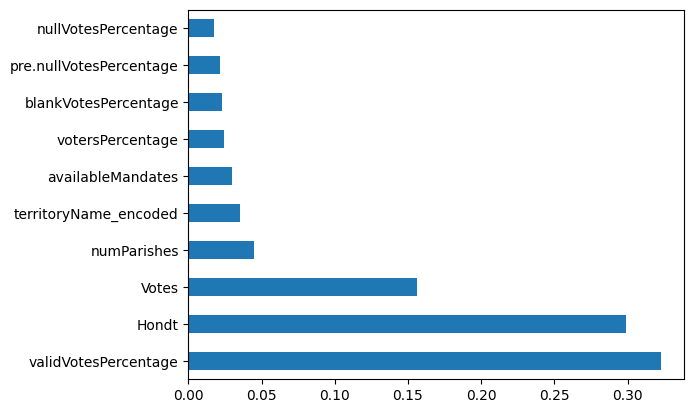

In [39]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

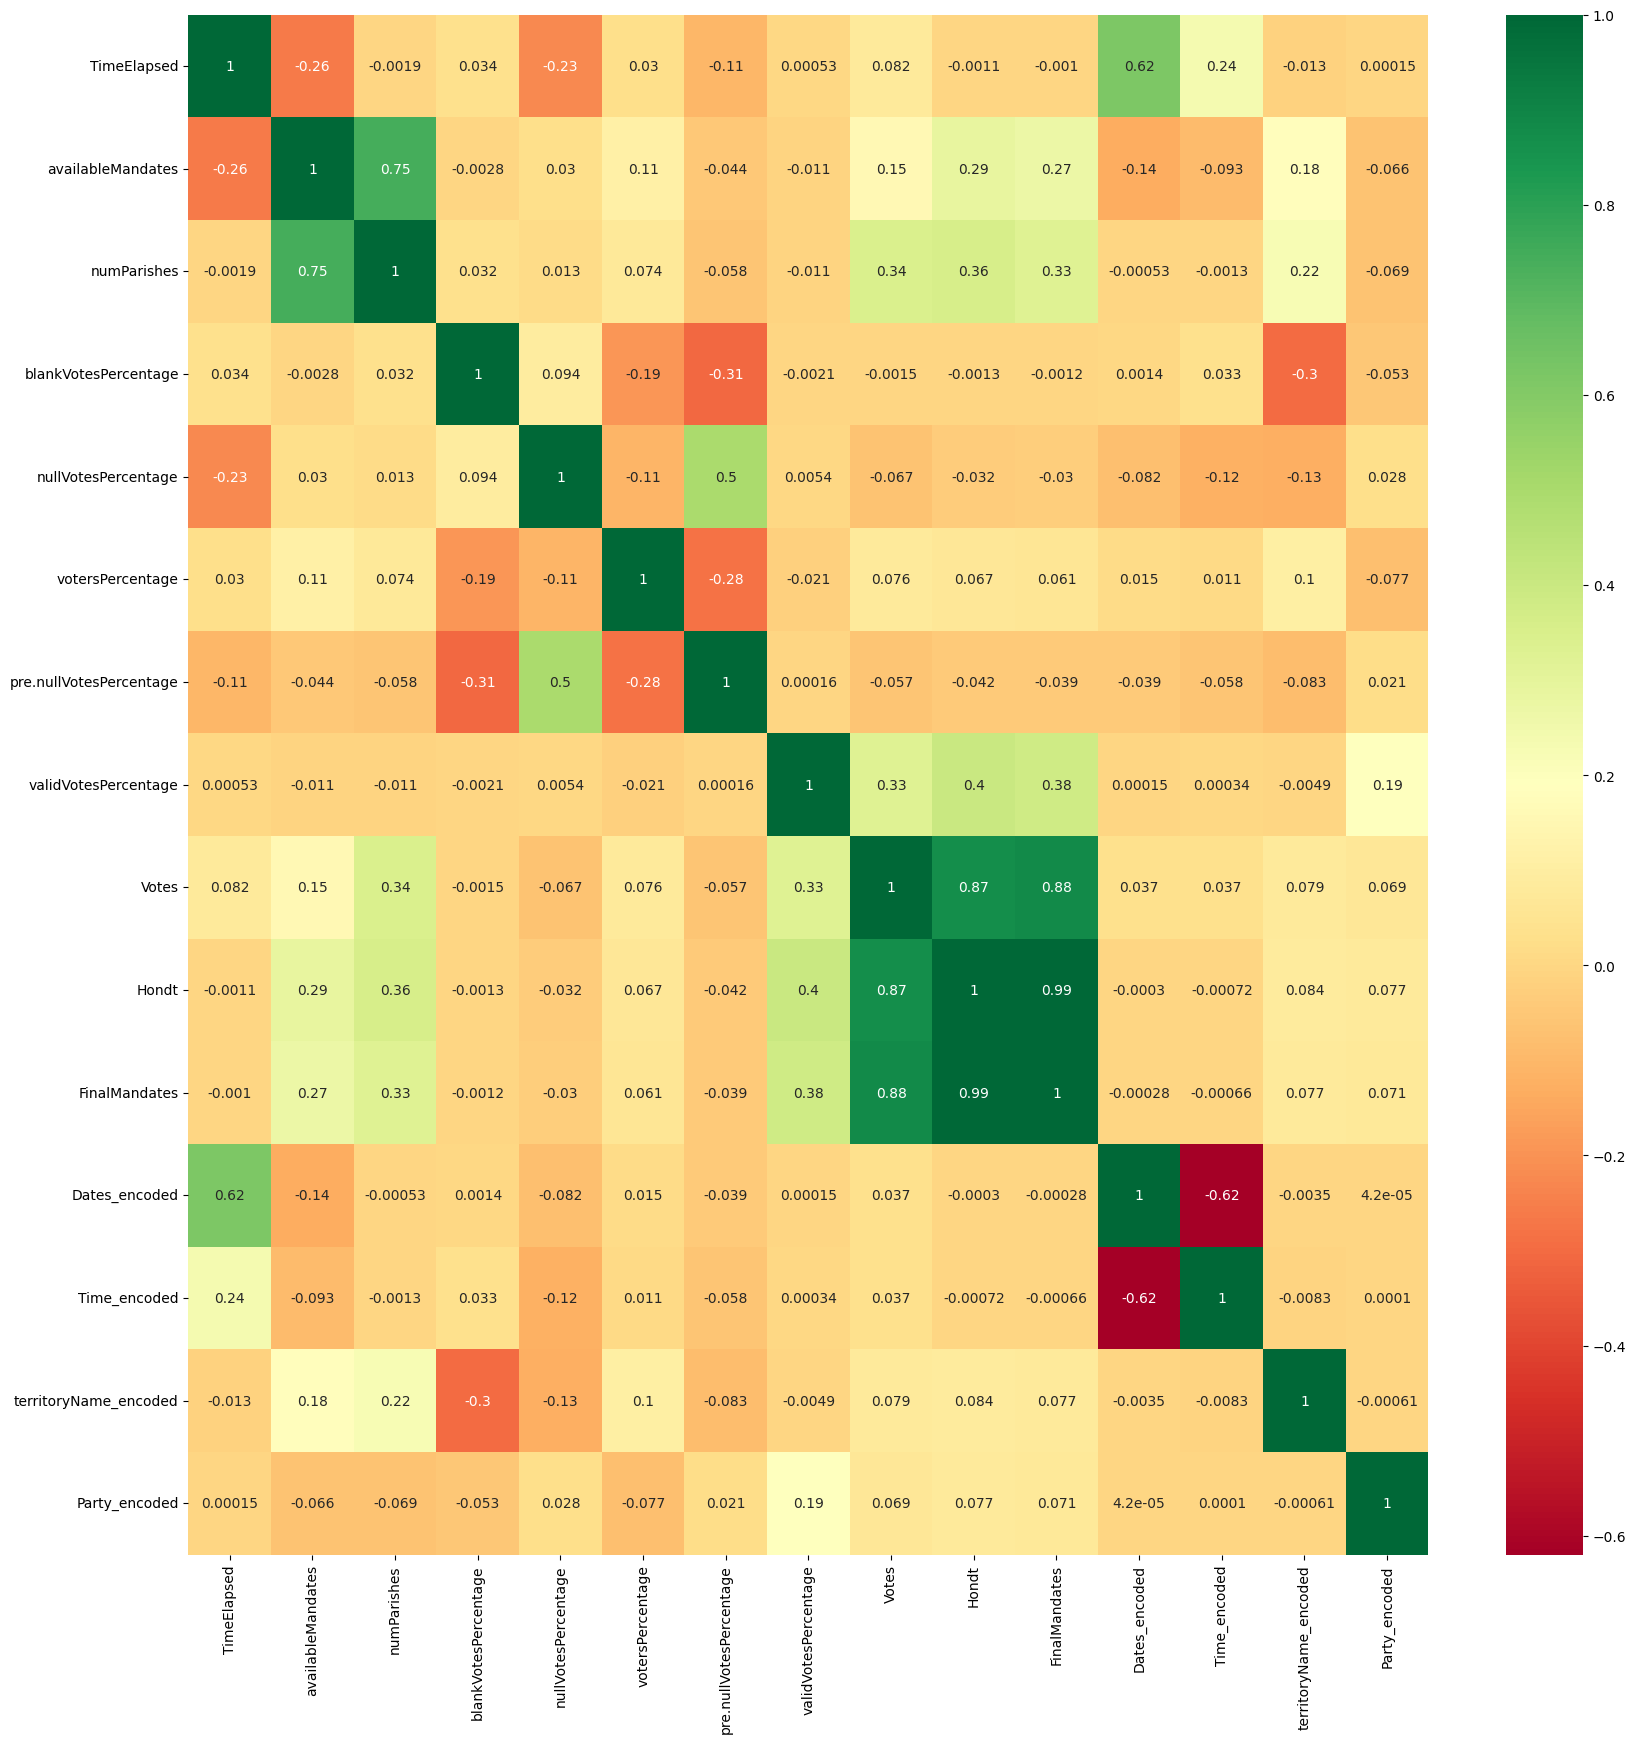

In [40]:
#get correlations of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [41]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0)

# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

In [42]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(regressor, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
# m1=LogisticRegression()
regressor.fit(X_train,y_train)
yp1=regressor.predict(X_test)






Scores: [0.25938836 0.05448245 0.05136655 0.08121765 0.05136655 0.07264327
 0.03632164 0.05136655 0.08121765 0.03632164 0.03634562 0.27917599
 0.05140047 0.06295246 0.08902822 0.25700233 0.08127127 0.06295246
 0.10280093 0.11636275]
Mean: 0.0957492399236782
Standard deviation: 0.07430810890027839


In [43]:
from sklearn.linear_model import LinearRegression
print("Model: Linear Regression")
lin_reg = LinearRegression()

tree_scores = cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)
# m2=DecisionTreeClassifier()
lin_reg.fit(X_train,y_train)
yp2=lin_reg.predict(X_test)

Model: Linear Regression
Scores: [0.69701011 0.67831082 0.69439736 0.44741073 0.66617663 0.6228765
 0.65554936 0.64022988 0.62241691 0.59499554 0.53810889 0.71031406
 0.61888099 0.73236124 0.62468441 0.52648765 0.6857807  0.61012915
 0.47867093 0.75801063]
Mean: 0.6301401257875764
Standard deviation: 0.07960586534975088


In [44]:
from sklearn.ensemble import RandomForestRegressor
print("Model: Random Forest Regressor")
forest_reg = RandomForestRegressor()

tree_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=20)
tree_rmse_scores = np.sqrt(-tree_scores)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

# m3=RandomForestClassifier()
forest_reg.fit(X_train,y_train)
yp3=forest_reg.predict(X_test)

Model: Random Forest Regressor
Scores: [0.16268444 0.06233739 0.05043086 0.09175294 0.07956283 0.07217194
 0.03241795 0.05300222 0.08447494 0.04461947 0.05124217 0.22536428
 0.0453359  0.11524728 0.07901845 0.05971752 0.045152   0.02938887
 0.08314651 0.06577883]
Mean: 0.07664233881497408
Standard deviation: 0.04531224600158553
